In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import datasets, linear_model
from scipy import stats

In [2]:
# This code gives the linear regression model for trip miles Vs fare. Based on the dependent variable "Trip Miles"
# we predict trip fare. 

# Read the CSV file
df = pd.read_csv("./miles_secs_2016.csv")
print(df)
# Remove outlier
z = np.abs(stats.zscore(df))
df = df[(z < 2).all(axis=1)]

# Extract X and Y axis for linear regression 
x = df['miles'].to_numpy()
y = df['minutes'].to_numpy()


            minutes  miles
0         29.750000   20.1
1         32.150000   15.2
2         12.866667    7.3
3         31.083333   15.4
4         23.350000   12.1
...             ...    ...
26069422   8.000000    1.8
26069423  10.000000    1.8
26069424  12.000000    1.8
26069425   8.000000    1.8
26069426  14.000000    1.8

[26069427 rows x 2 columns]


In [3]:
# Converting arrays in to 2d matrix form to make it compatible with sklearn model
x = [[value] for value in x]
y = [[value] for value in y]

# Running regression with training data
regr = linear_model.LinearRegression()
regr.fit(x,y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
# Reading test data
df_test = pd.read_csv("./miles_seconds_2017.csv")
z = np.abs(stats.zscore(df_test))
df_test = df_test[(z < 3).all(axis=1)]

# Extracting test data axes
x_test = df_test['miles']
y_test = df_test['minutes']

# Adjusting test data to 2d matrix
x_test = [[value] for value in x_test]
y_test = [[value] for value in y_test]

y_pred = regr.predict(x_test)

Coefficients: 
 [[1.75344708]]
Residual sum of squares: 38.37
Variance score: 0.66


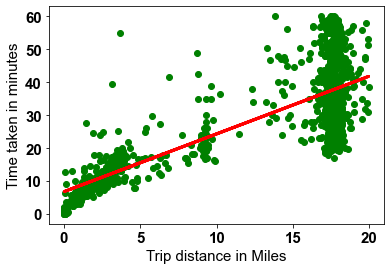

In [12]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean square error
print("Residual sum of squares: %.2f"% np.mean((regr.predict(x_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 15}

plt.rc('font', **font)
plt.scatter(x_test[2000:3000], y_test[2000:3000],  color='green')
plt.plot(x_test[2000:3000], y_pred[2000:3000], color='red', linewidth=3)
plt.xlabel("Trip distance in Miles")
plt.ylabel("Time taken in minutes")
plt.show()